# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


<Axes: >

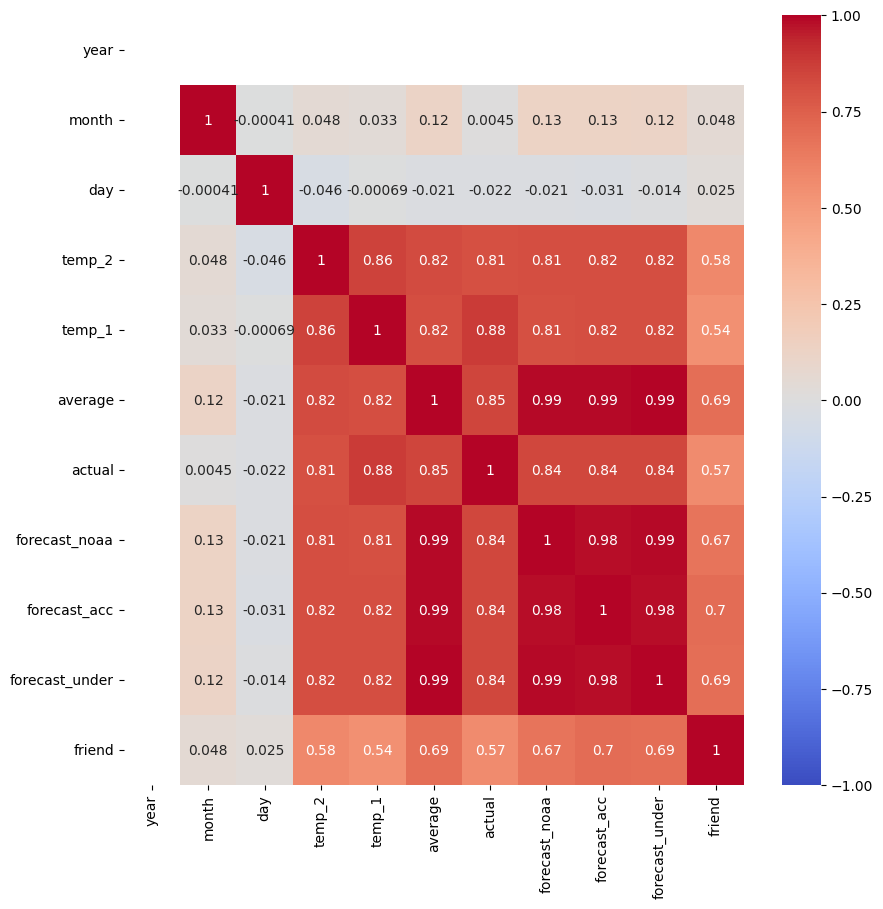

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = "coolwarm", vmin = -1)

In [6]:
df["week"].nunique()

7

In [7]:
df["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(df["week"])
df["week_id"] = lb.transform(df["week"])
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_id
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,5
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,6
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0


In [9]:
df["otoño"] = np.where(df["month"].isin([10, 11, 12]), 1, 0)
df["invierno"] = np.where(df["month"].isin([1, 2, 3]), 1, 0)
df["primavera"] = np.where(df["month"].isin([4, 5, 6]), 1, 0)
df["verano"] = np.where(df["month"].isin([7, 8, 9]), 1, 0)

<Axes: >

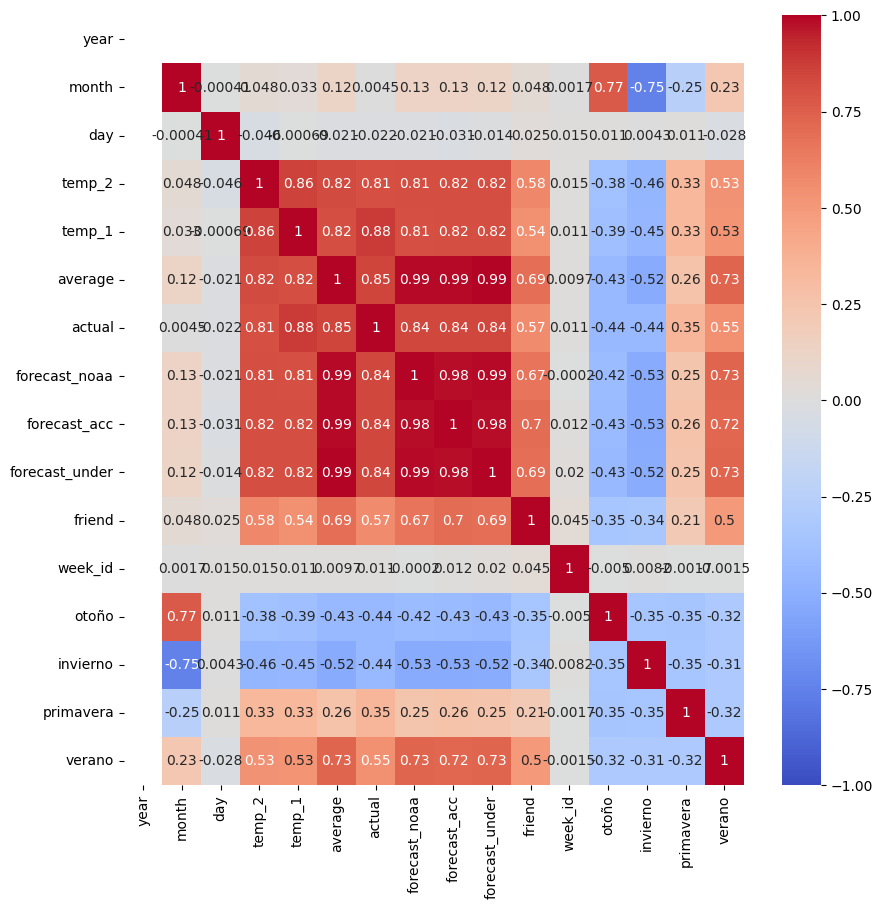

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = "coolwarm", vmin = -1)

### 3. Selecciona variables y divide en train y test

In [11]:
X = df[["average", "temp_1"]]
y = df["actual"]

### 4. Entrena el modelo


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(278, 2)
(278,)
(70, 2)
(70,)


In [14]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [15]:
model_dt.score(X_train, y_train)

0.9982864805175453

In [16]:
model_dt.score(X_test, y_test)

0.7216913624365342

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [17]:

pred = model_dt.predict(X_test)


print("Mae: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("Mape: ", mean_absolute_percentage_error(y_test, pred))

Mae:  4.3
MSE:  32.9
Mape:  0.06857608922553877


### 6. Representa el árbol de decisión

In [18]:
print(X_train.columns)

Index(['average', 'temp_1'], dtype='object')


[Text(0.4282763671875, 0.9705882352941176, 'average <= 55.55\nsquared_error = 143.799\nsamples = 278\nvalue = 62.432'),
 Text(0.1726875, 0.9117647058823529, 'temp_1 <= 47.5\nsquared_error = 46.5\nsamples = 120\nvalue = 51.483'),
 Text(0.30048193359375, 0.9411764705882353, 'True  '),
 Text(0.059, 0.8529411764705882, 'temp_1 <= 43.0\nsquared_error = 20.339\nsamples = 30\nvalue = 43.167'),
 Text(0.02, 0.7941176470588235, 'temp_1 <= 35.5\nsquared_error = 11.266\nsamples = 17\nvalue = 40.706'),
 Text(0.016, 0.7352941176470589, 'squared_error = 4.0\nsamples = 2\nvalue = 37.0'),
 Text(0.024, 0.7352941176470589, 'average <= 45.25\nsquared_error = 10.16\nsamples = 15\nvalue = 41.2'),
 Text(0.008, 0.6764705882352942, 'temp_1 <= 39.5\nsquared_error = 5.84\nsamples = 5\nvalue = 43.6'),
 Text(0.004, 0.6176470588235294, 'squared_error = 0.0\nsamples = 1\nvalue = 46.0'),
 Text(0.012, 0.6176470588235294, 'average <= 45.15\nsquared_error = 5.5\nsamples = 4\nvalue = 43.0'),
 Text(0.008, 0.55882352941176

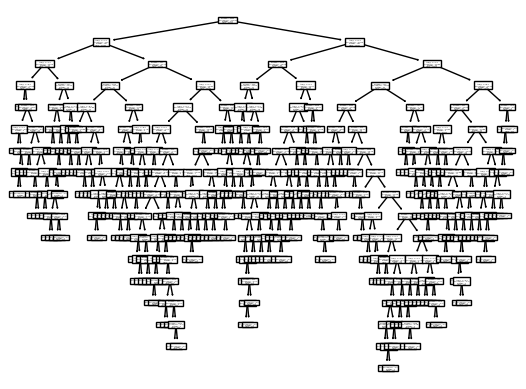

In [19]:
plot_tree(model_dt, feature_names = X_train.columns)

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [20]:
model_dt = DecisionTreeRegressor(max_depth=3)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [21]:
pred = model_dt.predict(X_test)

print("Mae: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("Mape: ", mean_absolute_percentage_error(y_test, pred))

Mae:  3.9329006213541358
MSE:  25.25835952928415
Mape:  0.06314690057204479


### 9. Vuelve a representar su árbol

[Text(0.5, 0.875, 'x[0] <= 55.55\nsquared_error = 143.799\nsamples = 278\nvalue = 62.432'),
 Text(0.25, 0.625, 'x[1] <= 47.5\nsquared_error = 46.5\nsamples = 120\nvalue = 51.483'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 43.0\nsquared_error = 20.339\nsamples = 30\nvalue = 43.167'),
 Text(0.0625, 0.125, 'squared_error = 11.266\nsamples = 17\nvalue = 40.706'),
 Text(0.1875, 0.125, 'squared_error = 13.929\nsamples = 13\nvalue = 46.385'),
 Text(0.375, 0.375, 'x[0] <= 49.2\nsquared_error = 24.479\nsamples = 90\nvalue = 54.256'),
 Text(0.3125, 0.125, 'squared_error = 10.397\nsamples = 37\nvalue = 50.622'),
 Text(0.4375, 0.125, 'squared_error = 18.655\nsamples = 53\nvalue = 56.792'),
 Text(0.75, 0.625, 'x[1] <= 67.5\nsquared_error = 57.518\nsamples = 158\nvalue = 70.747'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 60.65\nsquared_error = 18.309\nsamples = 59\nvalue = 64.407'),
 Text(0.5625, 0.125, 'squared_error = 10.522\nsamples = 21\nvalue = 61.048'),
 Te

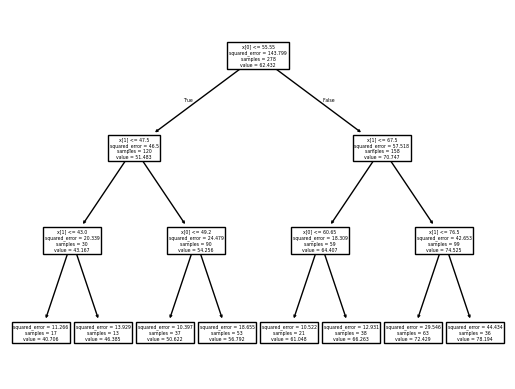

In [23]:
plot_tree(model_dt)


### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [26]:
from sklearn.model_selection import GridSearchCV
modelo = DecisionTreeRegressor(random_state=0)

parametros = {
    "max_depth": [2, 3, 4, 5, 6, 7],
    "criterion": ["squared_error", "absolute_error"]
}

gs = GridSearchCV(modelo, parametros, cv = 5, scoring = "neg_mean_absolute_error", verbose=3)

In [27]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=squared_error, max_depth=2;, score=-4.373 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2;, score=-4.463 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2;, score=-4.796 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2;, score=-4.905 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2;, score=-5.167 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=3;, score=-4.079 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=3;, score=-3.788 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3;, score=-3.968 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=3;, score=-4.363 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=3;, score=-4.582 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=4;, score=-4.045 total time=   0.0s
[CV 2/5] END cr

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_absolute_error', verbose=3)

In [30]:
gs.best_params_

{'criterion': 'squared_error', 'max_depth': 4}

In [31]:
gs.best_score_

np.float64(-4.1059169515480605)

In [28]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=4, random_state=0)

In [29]:
modelo_final = gs.best_estimator_

In [48]:
modelo_final = gs.best_estimator_

modelo_final.predict([[52, 49.3]])

c:\Users\Diego Nuñez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([55.60465116])

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [32]:
modelo_final.feature_importances_

array([0.76555994, 0.23444006])

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [33]:
df["target_cl"] = np.where(df["actual"]>59, 1, 0)

In [34]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_id,otoño,invierno,primavera,verano,target_cl
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,0,1,0,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,0,1,0,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,0,1,0,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,1,0,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,5,1,0,0,0,0
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,6,1,0,0,0,0
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,4,1,0,0,0,0
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,0,1,0,0,0,0


In [36]:
df["target_cl"].value_counts(normalize=True)

target_cl
1    0.586207
0    0.413793
Name: proportion, dtype: float64

In [38]:
X = df[["average", "temp_1"]]
y = df["target_cl"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
modelo_dt_c = DecisionTreeClassifier()

parametros_c = {
    "max_depth": [2, 3, 4, 5, 6, 7],
    "min_samples_leaf": [2, 4, 6, 8]
}

gs_c = GridSearchCV(modelo_dt_c, parametros_c, scoring="f1", verbose=3)
gs_c.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ...max_depth=2, min_samples_leaf=2;, score=0.941 total time=   0.0s
[CV 2/5] END ...max_depth=2, min_samples_leaf=2;, score=0.912 total time=   0.0s
[CV 3/5] END ...max_depth=2, min_samples_leaf=2;, score=0.923 total time=   0.0s
[CV 4/5] END ...max_depth=2, min_samples_leaf=2;, score=0.928 total time=   0.0s
[CV 5/5] END ...max_depth=2, min_samples_leaf=2;, score=0.921 total time=   0.0s
[CV 1/5] END ...max_depth=2, min_samples_leaf=4;, score=0.941 total time=   0.0s
[CV 2/5] END ...max_depth=2, min_samples_leaf=4;, score=0.912 total time=   0.0s
[CV 3/5] END ...max_depth=2, min_samples_leaf=4;, score=0.923 total time=   0.0s
[CV 4/5] END ...max_depth=2, min_samples_leaf=4;, score=0.928 total time=   0.0s
[CV 5/5] END ...max_depth=2, min_samples_leaf=4;, score=0.921 total time=   0.0s
[CV 1/5] END ...max_depth=2, min_samples_leaf=6;, score=0.941 total time=   0.0s
[CV 2/5] END ...max_depth=2, min_samples_leaf=6

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 4, 6, 8]},
             scoring='f1', verbose=3)

In [43]:
gs_c.best_params_

{'max_depth': 4, 'min_samples_leaf': 8}

In [45]:
gs_c.best_score_


np.float64(0.9173376623376622)

In [46]:
gs_c.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8)

In [47]:
modelo_final_c = gs_c.best_estimator_

modelo_final_c.predict([[52, 49.3]])

c:\Users\Diego Nuñez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])